# Naive Bayes

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [2]:
# load data
df = pd.read_csv('../data/df_preprocessed_log_dummies.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192662 entries, 0 to 192661
Data columns (total 43 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   state            192662 non-null  int64  
 1   delta_dead_laun  192662 non-null  float64
 2   launch_day       192662 non-null  int64  
 3   launch_hour      192662 non-null  int64  
 4   name_len         192662 non-null  int64  
 5   blurb_len        192662 non-null  int64  
 6   goal_usd_log     192662 non-null  float64
 7   AU               192662 non-null  int64  
 8   BE               192662 non-null  int64  
 9   CA               192662 non-null  int64  
 10  CH               192662 non-null  int64  
 11  DE               192662 non-null  int64  
 12  DK               192662 non-null  int64  
 13  ES               192662 non-null  int64  
 14  FR               192662 non-null  int64  
 15  GB               192662 non-null  int64  
 16  HK               192662 non-null  int6

,state,delta_dead_laun,launch_day,launch_hour,name_len,blurb_len,goal_usd_log,AU,BE,CA,...,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
0,1,720.0,3,19,23,125,6.907755,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,720.0,0,7,51,108,9.615805,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1439.0,3,19,34,133,9.479141,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,720.0,0,21,40,121,7.937375,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,720.0,3,4,31,134,8.160518,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Train Test Split

In [3]:
# split features from target (features: X, target: y)
X = df.drop('state', axis=1)
y = df['state']
X.head()

,delta_dead_laun,launch_day,launch_hour,name_len,blurb_len,goal_usd_log,AU,BE,CA,CH,...,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
0,720.0,3,19,23,125,6.907755,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,720.0,0,7,51,108,9.615805,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1439.0,3,19,34,133,9.479141,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,720.0,0,21,40,121,7.937375,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,720.0,3,4,31,134,8.160518,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the data sets
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (134863, 42)
y_train: (134863,)
X_test: (57799, 42)
y_test: (57799,)


In [5]:
# create Naive Bayes classifier

# instantiate classifier
NB_clf = GaussianNB()
# fit model to training data
NB_clf.fit(X_train, y_train)

# predict target values for train data
y_pred_train = NB_clf.predict(X_train)
# predict target values for test data
y_pred = NB_clf.predict(X_test)


In [6]:

# Print classification reports for NB classifier

## train data
print('Classification report for TRAIN data: \n {}'.format(classification_report(y_train, y_pred_train)))
print("--------"*10)

## test data
print('Classification report for TEST data: \n {}'.format(classification_report(y_test, y_pred)))
print("--------"*10)

Classification report for TRAIN data: 
               precision    recall  f1-score   support

           0       0.51      0.69      0.59     52770
           1       0.74      0.58      0.65     82093

    accuracy                           0.62    134863
   macro avg       0.63      0.64      0.62    134863
weighted avg       0.65      0.62      0.63    134863

--------------------------------------------------------------------------------
Classification report for TEST data: 
               precision    recall  f1-score   support

           0       0.51      0.69      0.59     22427
           1       0.75      0.58      0.66     35372

    accuracy                           0.63     57799
   macro avg       0.63      0.64      0.62     57799
weighted avg       0.66      0.63      0.63     57799

--------------------------------------------------------------------------------


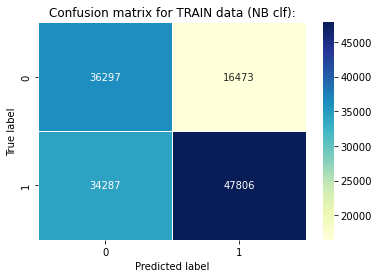

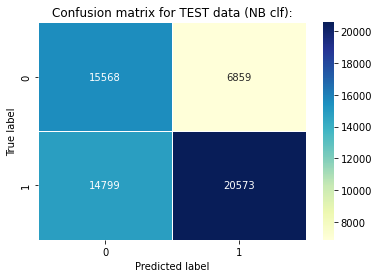

In [7]:
# Evaluate the model with a confusion matrix
## train data
cm = confusion_matrix(y_train, y_pred_train)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data, remove fmt='d' from heatmap code!
plt.figure()
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for TRAIN data (NB clf):');

## test data
cm = confusion_matrix(y_test, y_pred)
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data, remove fmt='d' from heatmap code!
plt.figure()
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for TEST data (NB clf):');